
#MVP: *Machine Learning & Analytics*
**Autor:** _Pedro Chimenti S. Bernabe_  

**Data:** 27/09/2025

**Matrícula:**

**Dataset:**Electric Vehicle Trip Energy Consumption Data

> **Importante:**
O dataset utilizado é o "Electric Vehicle Trip Energy Consumption Data".
Ele contém informações sobre viagens de veículos elétricos, incluindo atributos como distância da viagem, hora do dia, dia da semana, localização (longitude e latitude), velocidade, corrente, voltagem, temperatura da bateria e duração da viagem.
A variável alvo principal que estamos tentando prever é o "Trip Energy Consumption" (Consumo de Energia da Viagem), que é uma variável contínua, tornando este um problema de regressão.
O dataset original possui mais de 10.000 instâncias e não apresentou valores ausentes na análise inicial.
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
SEED = 7
np.random.seed(SEED)


In [2]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Carga de  Dados

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thejascc12/electric-vehicle-trip-energy-consumption-data")

print("Path to dataset files:", path)

100%|██████████| 390k/390k [00:00<00:00, 18.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thejascc12/electric-vehicle-trip-energy-consumption-data/versions/1


In [4]:
# Load the data from the CSV file into a pandas DataFrame
csv_file_path = f'{path}/Electric Vehicle Trip Energy Consumption Data.csv'
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,Trip Energy Consumption,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length
0,0.672,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13
1,0.896,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18
2,1.344,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21
3,1.344,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16
4,0.896,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129


##Movemos a coluna "Trip Energy Consumption" para a última posição para facilitar a separação entre features e target.

In [5]:
# Move 'Trip Energy Consumption' to the last column
if 'Trip Energy Consumption' in df.columns:
    trip_energy_column = df.pop('Trip Energy Consumption')
    df['Trip Energy Consumption'] = trip_energy_column
    print("Moved 'Trip Energy Consumption' to the last column.")
else:
    print("'Trip Energy Consumption' column not found in the DataFrame.")

# Display the first few rows to confirm the column order
display(df.head())

Moved 'Trip Energy Consumption' to the last column.


,Vehicle ID,Trip Distance,Time of Day,Day of the Week,Longitude,Latitude,Speed,Current,Total Voltage,Maximum Cell Temperature of Battery,Minimum Cell Temperature of Battery,Trip Time Length,Trip Energy Consumption
0,1,6,10.333333,4,121.497948,31.281574,246.000000,2.583348,308.283333,31.000000,30.833333,13,0.672
1,1,6,16.000000,4,121.587564,31.256070,393.714286,2.985729,304.485714,29.000000,28.000000,18,0.896
2,1,7,16.090909,2,121.576968,31.262034,192.000000,2.354560,308.463636,31.272727,30.000000,21,1.344
3,1,8,19.000000,5,121.549709,31.257796,369.240000,1.540015,308.060000,30.000000,30.000000,16,1.344
4,1,6,14.166667,6,121.582280,31.215030,413.450617,9.659892,304.473457,28.000000,28.000000,129,0.896


#Analise dos Dados
##Exploramos o dataset para entender sua estrutura, tipos de dados, verificar valores ausentes e obter estatísticas descritivas. Visualizamos a distribuição de algumas variáveis.

In [6]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())
print("\nValores ausentes :")
print(df.isnull().sum())
print(df.describe())

Total de instâncias: 10151

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10151 entries, 0 to 10150
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           10151 non-null  int64  
 1   Trip Distance                        10151 non-null  int64  
 2   Time of Day                          10151 non-null  float64
 3   Day of the Week                      10151 non-null  int64  
 4   Longitude                            10151 non-null  float64
 5   Latitude                             10151 non-null  float64
 6   Speed                                10151 non-null  float64
 7   Current                              10151 non-null  float64
 8   Total Voltage                        10151 non-null  float64
 9   Maximum Cell Temperature of Battery  10151 non-null  float64
 10  Minimum Cell Temperature of Battery  10

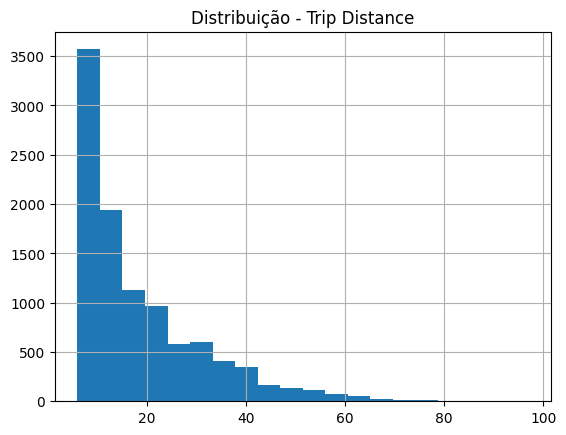

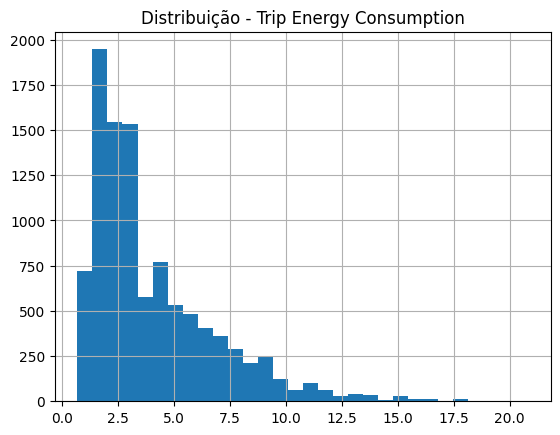

In [7]:
_ = df["Trip Distance"].hist(bins=20)
plt.title("Distribuição - Trip Distance")
plt.show()

_ = df["Trip Energy Consumption"].hist(bins=30)
plt.title("Distribuição - Trip Energy Consumption")
plt.show()

#Preparação dos dados
Separamos os dados em conjuntos de treino e teste (X_train, y_train, X_test, y_test) usando train_test_split.

Configuramos a validação cruzada (KFold) para avaliar os modelos de forma mais robusta.

Utilizamos métodos como SelectKBest e RFE para explorar a importância das features, embora a remoção final de colunas tenha sido baseada em seleções explícitas

Removemos algumas colunas que consideramos menos relevantes de acordo com Selectkbest para a análise/modelagem, como 'Vehicle ID', 'Day of the Week', 'Longitude', 'Total Voltage', 'Maximum Cell Temperature of Battery', e 'Minimum Cell Temperature of Battery'.

In [8]:
# Separação em bases de treino e teste (holdout)
array = df.values
X = array[:,0:12] # atributos
y = array[:,12] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
scoring = 'accuracy'
num_particoes = 3 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7) # definindo uma semente global

In [9]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=6)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df.columns[0:12])

# Exibe as pontuações de cada atributos e os 6 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df.columns[0:12]))


Número original de atributos: 12

Número reduzido de atributos: 6

Atributos Originais: Index(['Vehicle ID', 'Trip Distance', 'Time of Day', 'Day of the Week',
       'Longitude', 'Latitude', 'Speed', 'Current', 'Total Voltage',
       'Maximum Cell Temperature of Battery',
       'Minimum Cell Temperature of Battery', 'Trip Time Length'],
      dtype='object')

Scores dos Atributos Originais: [2.751e+00 6.762e+02 3.238e+00 8.704e-01 3.369e-01 3.824e+00 3.127e+00
 3.890e+00 1.996e+00 3.109e+00 2.655e+00 1.071e+01]

Atributos Selecionados: ['Trip Distance' 'Time of Day' 'Latitude' 'Speed' 'Current'
 'Trip Time Length']


In [10]:
# Remove the specified columns
columns_to_drop = [
    'Vehicle ID',
    'Day of the Week',
    'Longitude',
    'Total Voltage',
    'Maximum Cell Temperature of Battery',
    'Minimum Cell Temperature of Battery'
]

# Ensure columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df = df.drop(existing_columns_to_drop, axis=1)
    print(f"Removed columns: {existing_columns_to_drop}")
else:
    print("None of the specified columns to drop were found in the DataFrame.")

# Display the first few rows to confirm the columns are removed
display(df.head())

Removed columns: ['Vehicle ID', 'Day of the Week', 'Longitude', 'Total Voltage', 'Maximum Cell Temperature of Battery', 'Minimum Cell Temperature of Battery']


,Trip Distance,Time of Day,Latitude,Speed,Current,Trip Time Length,Trip Energy Consumption
0,6,10.333333,31.281574,246.000000,2.583348,13,0.672
1,6,16.000000,31.256070,393.714286,2.985729,18,0.896
2,7,16.090909,31.262034,192.000000,2.354560,21,1.344
3,8,19.000000,31.257796,369.240000,1.540015,16,1.344
4,6,14.166667,31.215030,413.450617,9.659892,129,0.896


#Modelagem
Avaliamos vários modelos de regressão (Linear Regression, Ridge, Lasso, KNN, Decision Tree Regressor, SVR) usando validação cruzada com a métrica MSE negativo.
Também avaliamos métodos de ensemble (BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor) da mesma forma.
Comparamos o desempenho dos modelos usando boxplots.
Configuramos pipelines para incluir imputação de valores ausentes e diferentes pré-processamentos (padronização e normalização) antes de aplicar os modelos.

LR: MSE 1.10 (0.06) - RMSE 1.05
Ridge: MSE 1.10 (0.06) - RMSE 1.05
Lasso: MSE 1.22 (0.01) - RMSE 1.11
KNN: MSE 1.80 (0.06) - RMSE 1.34
CART: MSE 1.76 (0.08) - RMSE 1.32
SVR: MSE 1.45 (0.09) - RMSE 1.20


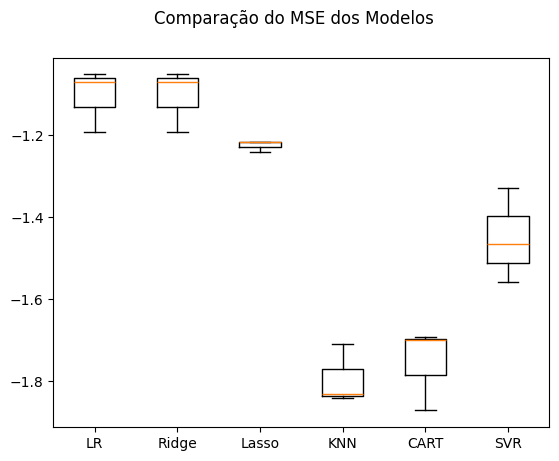

In [11]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 5 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
# Criando um modelo com todo o conjunto de treino
model =LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 1.08
RMSE 1.04


##O modelo treinado  apresentou os melhores resultados foi a regressao linear.

LR: -1.104793 (0.062555)
KNN: -1.795277 (0.060228)
CART: -1.790447 (0.060107)
Ridge: -1.104779 (0.062541)
Lasso: -1.224555 (0.011293)
SVM: -1.451017 (0.093884)
BaggingR: -0.892595 (0.013446)
RFR: -0.954160 (0.024615)
ETR: -1.026550 (0.024090)
AdaR: -2.237242 (0.153708)
GBR: -0.917575 (0.016151)
VotingR: -1.090529 (0.046891)


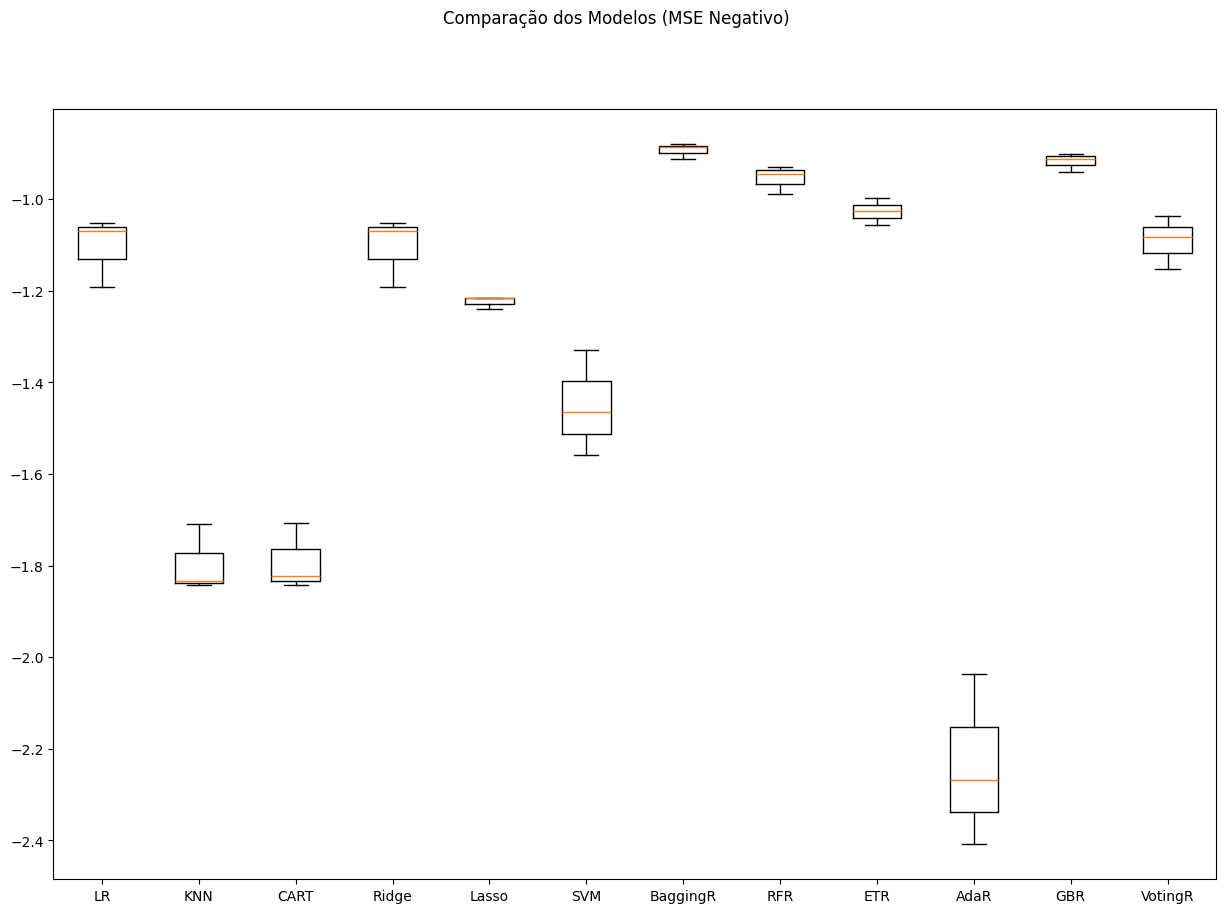

In [13]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos (Regressão)
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('SVM', SVR())) # SVR para regressão

# Definindo os parâmetros do estimador base para o BaggingRegressor
base_regressor = DecisionTreeRegressor()
num_trees = 50
max_features = 3

# Criando os modelos para o VotingRegressor
regressor_bases = []
model1_reg = LinearRegression()
regressor_bases.append(('linear', model1_reg))
model2_reg = DecisionTreeRegressor()
regressor_bases.append(('cart', model2_reg))
model3_reg = SVR()
regressor_bases.append(('svm', model3_reg))

# Criando os ensembles de regressão e adicionando-os na lista de modelos
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor

models.append(('BaggingR', BaggingRegressor(estimator=base_regressor, n_estimators=num_trees, random_state=7)))
models.append(('RFR', RandomForestRegressor(n_estimators=num_trees, max_features=max_features, random_state=7)))
models.append(('ETR', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features, random_state=7)))
models.append(('AdaR', AdaBoostRegressor(n_estimators=num_trees, random_state=7)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=num_trees, random_state=7)))
models.append(('VotingR', VotingRegressor(regressor_bases, n_jobs=-1))) # Using VotingRegressor

# Listas para armazenar os resultados
results = []
names = []

# Import SimpleImputer and Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Avaliação dos modelos usando a métrica de regressão (neg_mean_squared_error)
for name, model in models:
    # Create a pipeline with imputation and the model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        (name, model)
    ])
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos (MSE Negativo)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR-orig: -1.1048 (0.0626)
KNN-orig: -1.7953 (0.0602)
CART-orig: -1.7904 (0.0601)
SVM-orig: -1.4510 (0.0939)
Bag-orig: -0.8926 (0.0134)
RF-orig: -0.9542 (0.0246)
ET-orig: -1.0266 (0.0241)
Ada-orig: -2.2372 (0.1537)
GB-orig: -0.9176 (0.0162)
Vot-orig: -1.0914 (0.0603)
LR-padr: -1.1048 (0.0626)
KNN-padr: -1.5635 (0.0417)
CART-padr: -1.7781 (0.0699)
SVM-padr: -1.0897 (0.0577)
Bag-padr: -0.8927 (0.0151)
RF-padr: -0.9518 (0.0273)
ET-padr: -1.0272 (0.0268)
Ada-padr: -2.2209 (0.0717)
GB-padr: -0.9188 (0.0161)
Vot-padr: -0.9978 (0.0486)
LR-norm: -1.1048 (0.0626)
KNN-norm: -1.8971 (0.0920)
CART-norm: -1.7814 (0.0702)
SVM-norm: -1.1021 (0.0538)
Bag-norm: -0.8928 (0.0128)
RF-norm: -0.9502 (0.0287)
ET-norm: -1.0226 (0.0288)
Ada-norm: -2.2669 (0.1338)
GB-norm: -0.9194 (0.0158)
Vot-norm: -1.0154 (0.0427)


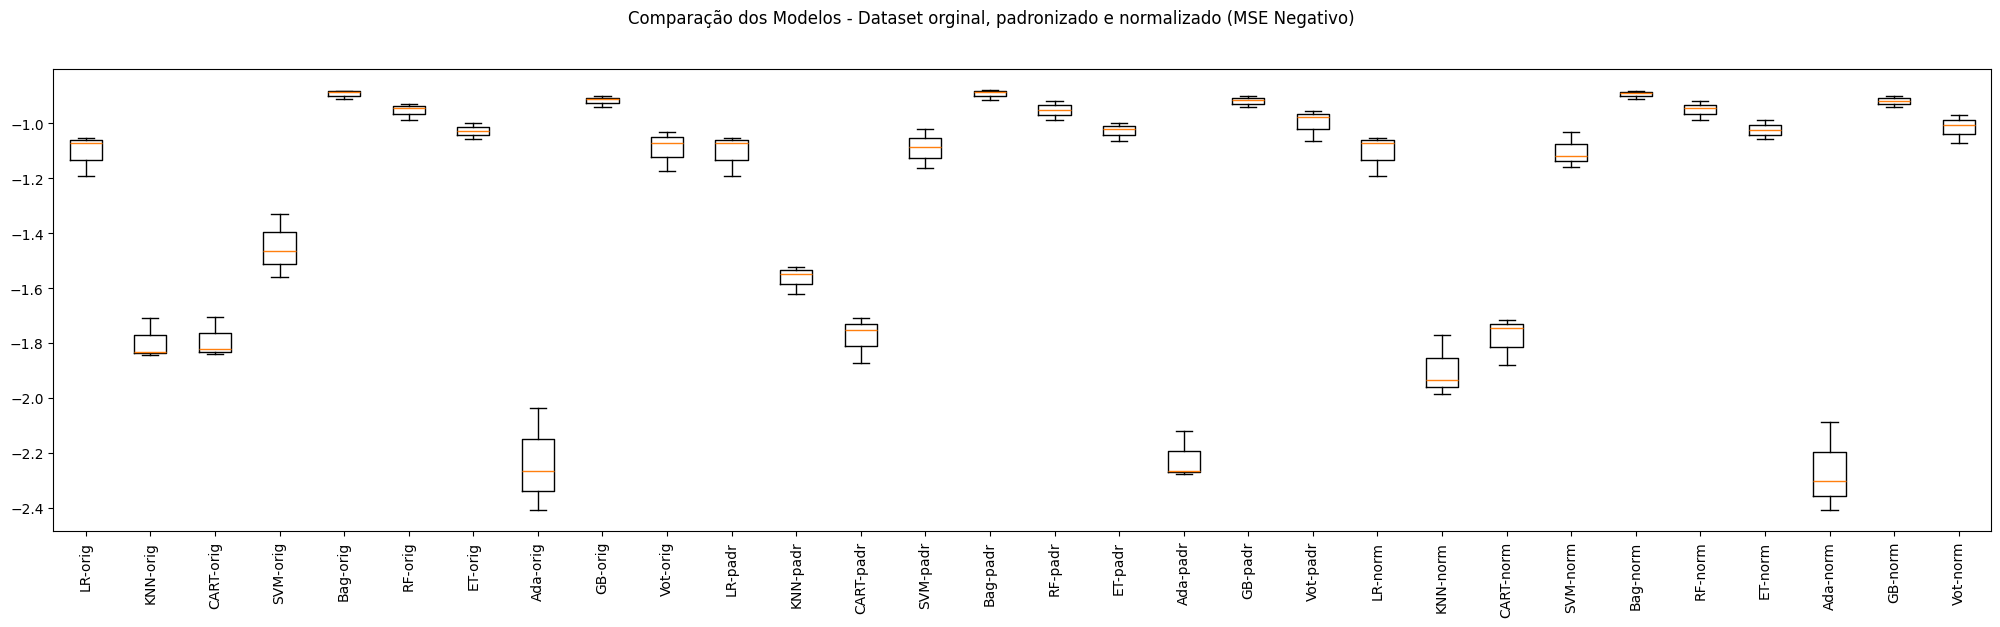

In [14]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados (Regressão)
lr = ('LR', LinearRegression())
knn = ('KNN', KNeighborsRegressor())
cart = ('CART', DecisionTreeRegressor())
svm = ('SVM', SVR())
bagging = ('Bag', BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=7))
random_forest = ('RF', RandomForestRegressor(n_estimators=50, max_features=3, random_state=7))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=50, max_features=3, random_state=7))
adaboost = ('Ada', AdaBoostRegressor(n_estimators=50, random_state=7))
gradient_boosting = ('GB', GradientBoostingRegressor(n_estimators=50, random_state=7))
regressor_bases = []
regressor_bases.append(('linear', LinearRegression()))
regressor_bases.append(('cart', DecisionTreeRegressor()))
regressor_bases.append(('svm', SVR()))
voting = ('Voting', VotingRegressor(regressor_bases, n_jobs=-1)) # Using VotingRegressor

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
imputer = ('Imputer', SimpleImputer(missing_values=np.nan, strategy='mean')) # Added imputer


# Montando os pipelines

# Dataset original (with Imputation)
pipelines.append(('LR-orig', Pipeline([imputer, lr])))
pipelines.append(('KNN-orig', Pipeline([imputer, knn])))
pipelines.append(('CART-orig', Pipeline([imputer, cart])))
# pipelines.append(('NB-orig', Pipeline([imputer, naive_bayes]))) # Removed Naive Bayes as it's for classification
pipelines.append(('SVM-orig', Pipeline([imputer, svm])))
pipelines.append(('Bag-orig', Pipeline([imputer, bagging])))
pipelines.append(('RF-orig', Pipeline([imputer, random_forest])))
pipelines.append(('ET-orig', Pipeline([imputer, extra_trees])))
pipelines.append(('Ada-orig', Pipeline([imputer, adaboost])))
pipelines.append(('GB-orig', Pipeline([imputer, gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([imputer, voting])))

# Dataset Padronizado (with Imputation and StandardScaler)
pipelines.append(('LR-padr', Pipeline([imputer, standard_scaler, lr])))
pipelines.append(('KNN-padr', Pipeline([imputer, standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([imputer, standard_scaler, cart])))
# pipelines.append(('NB-padr', Pipeline([imputer, standard_scaler, naive_bayes]))) # Removed Naive Bayes
pipelines.append(('SVM-padr', Pipeline([imputer, standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([imputer, standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([imputer, standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([imputer, standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([imputer, standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([imputer, standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([imputer, standard_scaler, voting])))

# Dataset Normalizado (with Imputation and MinMaxScaler)
pipelines.append(('LR-norm', Pipeline([imputer, min_max_scaler, lr])))
pipelines.append(('KNN-norm', Pipeline([imputer, min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([imputer, min_max_scaler, cart])))
# pipelines.append(('NB-norm', Pipeline([imputer, min_max_scaler, naive_bayes]))) # Removed Naive Bayes
pipelines.append(('SVM-norm', Pipeline([imputer, min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([imputer, min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([imputer, min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([imputer, min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([imputer, min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([imputer, min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([imputer, min_max_scaler, voting])))

# Setting the scoring metric to negative mean squared error for regression
scoring = 'neg_mean_squared_error'

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.4f (%.4f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado (MSE Negativo)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

##Após a analise dos modelos normalizado e padronizado, podemos confirmar que O mais proximo de zero foi o BaggingRegressor Normalizado ( Bag-norm: -0.893 (0.013))

In [15]:
np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline como instâncias
imputer = ('Imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
bagging_regressor = ('Bag', BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=7)) # Create an instance of BaggingRegressor

# Montando os pipelines que incluem o BaggingRegressor para otimização
pipelines.append(('Bag-orig', Pipeline([imputer, bagging_regressor])))
pipelines.append(('Bag-padr', Pipeline([imputer, standard_scaler, bagging_regressor])))
pipelines.append(('Bag-norm', Pipeline([imputer, min_max_scaler, bagging_regressor])))

# Define the parameter distribution for BaggingRegressor
param_distributions = {
    'Bag__n_estimators': [10, 50, 100, 200],
}

# Setting the scoring metric to negative mean squared error for regression
scoring = 'neg_mean_squared_error'

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Prepara e executa o RandomizedSearchCV
for name, model_pipeline in pipelines: # Renamed 'model' to 'model_pipeline' for clarity
    print(f"Running RandomizedSearchCV for pipeline: {name}")
    # Set n_iter to control the number of parameter combinations sampled
    random_search = RandomizedSearchCV(estimator=model_pipeline, param_distributions=param_distributions,
                                       n_iter=3, scoring=scoring, cv=kfold, random_state=7, n_jobs=-1)
    random_search.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Pipeline: %s - Melhor Score: %f usando %s" % (name, random_search.best_score_, random_search.best_params_))

Running RandomizedSearchCV for pipeline: Bag-orig
Pipeline: Bag-orig - Melhor Score: -0.884376 usando {'Bag__n_estimators': 100}
Running RandomizedSearchCV for pipeline: Bag-padr
Pipeline: Bag-padr - Melhor Score: -0.885590 usando {'Bag__n_estimators': 100}
Running RandomizedSearchCV for pipeline: Bag-norm
Pipeline: Bag-norm - Melhor Score: -0.884994 usando {'Bag__n_estimators': 100}


###Tive que utilizar o RandomizedSearchCV e diminuir o numero de interações (n_inter) para otimizar os hipermarametros do bagging regressor para uma eficiencia computacional, velocidade.

#Avaliação no conjunto teste
Treinamos um modelo (Bagging Regressor) no conjunto de treino e o avaliamos no conjunto de teste usando MSE e RMSE para ter uma estimativa final de desempenho.

In [16]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
# Use a regression model instead of a classification model
model = BaggingRegressor()
model.fit(rescaledX, y_train)

# Estimativa do desempenho no conjunto de teste usando métricas de regressão
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)

# Use regression metrics instead of classification metrics
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(mse)) # Calculate RMSE


MSE 0.95
RMSE 0.98


In [17]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

BaggingRegressor()

#Previsão com Novos Dados:
Preparamos uma estrutura para novos dados de entrada, garantindo que tivessem as mesmas features e formato dos dados de treino, aplicamos a padronização e imputação necessárias, e utilizamos o modelo treinado para fazer previsões de consumo de energia para essas novas viagens.

In [18]:
feature_col_names = [
    'Vehicle ID', 'Trip Distance', 'Time of Day', 'Day of the Week',
    'Longitude', 'Latitude', 'Speed', 'Current', 'Total Voltage',
    'Maximum Cell Temperature of Battery', 'Minimum Cell Temperature of Battery',
    'Trip Time Length'
]


data = {}
for col_name in feature_col_names:
    if col_name == 'Vehicle ID':
        data[col_name] = [1, 5, 3]
    elif col_name == 'Trip Distance':
        data[col_name] = [6, 100, 110]
    elif col_name == 'Time of Day':
        data[col_name] = [16, 18.5, 9.0]
    elif col_name == 'Day of the Week':
        data[col_name] = [4, 3, 5]
    elif col_name == 'Longitude':
        data[col_name] = [121.58, 122.0, 123.0]
    elif col_name == 'Latitude':
        data[col_name] = [31.25, 32.0, 33.0]
    elif col_name == 'Speed':
        data[col_name] = [393.7, 65.0, 40.2]
    elif col_name == 'Current':
        data[col_name] = [2.98, 12.5, 8.0]
    elif col_name == 'Total Voltage':
        data[col_name] = [304.48, 305.5, 298.0]
    elif col_name == 'Maximum Cell Temperature of Battery':
        data[col_name] = [29.0, 28.0, 22.5]
    elif col_name == 'Minimum Cell Temperature of Battery':
        data[col_name] = [28.0, 27.0, 21.0]
    elif col_name == 'Trip Time Length':
        data[col_name] = [18, 75, 50]

entrada = pd.DataFrame(data, columns=feature_col_names) # Use the defined feature_col_names

array_entrada = entrada.values
# X_entrada should now have the correct features in the correct order
X_entrada = array_entrada.astype(float)

rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.645 -0.957  0.458  0.398  0.098  0.008  3.518 -0.185 -0.239  1.759
   1.751 -1.167]
 [-1.356  6.233  0.953 -0.104  0.272  0.118  0.03   1.469  0.051  1.592
   1.585 -0.16 ]
 [-1.501  6.998 -0.926  0.899  0.686  0.265 -0.233  0.687 -2.086  0.673
   0.589 -0.602]]


In [19]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Use the same strategy as in model evaluation
rescaledEntradaX_imputed = imputer.fit_transform(rescaledEntradaX)

# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX_imputed)
print(saidas)

[ 0.986 15.725 18.301]


Com base nas avaliações, os modelos de ensemble, particularmente o Bagging Regressor, o Gradient Boosting Regressor e o Random Forest Regressor, demonstraram o melhor desempenho geral (menor MSE negativo) na validação cruzada para prever o consumo de energia da viagem. O pré-processamento com padronização ou normalização teve impacto, mas os modelos de ensemble mais fortes tiveram desempenho robusto mesmo nos dados originais com imputação. A otimização de hiperparâmetros confirmou que um número maior de estimadores (como 100) é benéfico para o Bagging Regressor.

A Regressão Linear, embora mais simples, também apresentou um desempenho razoável e consistente entre a validação cruzada e a avaliação no teste.

Em resumo, modelos baseados em árvores e métodos de ensemble parecem ser os mais promissores para este problema de regressão, com o Bagging Regressor se destacando ligeiramente nas avaliações iniciais.